In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 84s 0us/step


(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [20]:
def img(x):
    plt.imshow(X_train[x])
    plt. xlabel(classes[y_train[x]])

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
y_train = y_train.reshape(-1)   #2D to 1D  .... flatten matrix

In [29]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

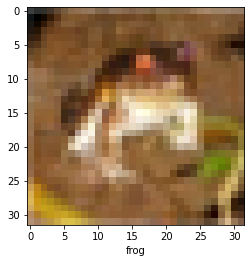

In [30]:
img(0)

In [31]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
ann = models.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(10, activation='softmax')])   #non binary  output

ann.compile (optimizer= 'SGD' , loss= 'sparse_categorical_crossentropy' , metrics= ['accuracy'] ) #loss = y is value not categorical vector

ann.fit (X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 72s 45ms/step - loss: 1.8326 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6518 - accuracy: 0.4189
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5736 - accuracy: 0.4502
Epoch 4/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5198 - accuracy: 0.4701
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4776 - accuracy: 0.4840


In [42]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [45]:
y_pred[0]

array([0.0307172 , 0.11974428, 0.04468947, 0.2418017 , 0.02881867,
       0.11384286, 0.2657772 , 0.00339444, 0.14129665, 0.00991754],
      dtype=float32)

In [46]:
y_pred_classes = [np.argmax(element) for element in y_pred]   #index of max probability comparable to y_test values

In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print (classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1000
           1       0.56      0.61      0.59      1000
           2       0.46      0.20      0.28      1000
           3       0.37      0.28      0.32      1000
           4       0.45      0.40      0.42      1000
           5       0.44      0.30      0.35      1000
           6       0.40      0.72      0.52      1000
           7       0.63      0.43      0.51      1000
           8       0.50      0.73      0.59      1000
           9       0.49      0.60      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.46     10000
weighted avg       0.48      0.48      0.46     10000



In [49]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.4892 - accuracy: 0.4772


[1.4891597032546997, 0.4772000014781952]

In [48]:
#filter = amount of patterns to be found
#kernel_size = filter size to be multipled = 3x3 matrix
#maxpooling = select max from 2x2 matrix

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(10, activation='softmax')])


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 356s 227ms/step - loss: 1.3686 - accuracy: 0.5120
Epoch 2/5
1563/1563 [==============================] - 345s 221ms/step - loss: 0.9912 - accuracy: 0.6501
Epoch 3/5
1563/1563 [==============================] - 340s 217ms/step - loss: 0.7665 - accuracy: 0.7314
Epoch 4/5
1563/1563 [==============================] - 336s 215ms/step - loss: 0.5493 - accuracy: 0.8087
Epoch 5/5
1563/1563 [==============================] - 329s 211ms/step - loss: 0.3528 - accuracy: 0.8808


In [50]:
y_pred_cnn = [np.argmax(i) for i in cnn.predict(X_test)]
print (classification_report(y_test, y_pred_cnn))

313/313 [==============================] - 9s 28ms/step
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.77      0.82      0.79      1000
           2       0.58      0.49      0.53      1000
           3       0.48      0.48      0.48      1000
           4       0.64      0.55      0.59      1000
           5       0.54      0.59      0.57      1000
           6       0.67      0.78      0.72      1000
           7       0.74      0.75      0.74      1000
           8       0.81      0.77      0.79      1000
           9       0.83      0.66      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

